# Sentiment Analysis

## Introduction

For sentiment analysis, I use the Rotten Tomatoes Movie Dataset. The main goal here is to analyze the critics consensus column to find out the level of ratings and frequency of expressions used.

To start the analysis, let's import the libraries and the dataset.

In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [94]:
df = pd.read_csv("./Sentiment Analysis/rotten_tomatoes_movies.csv")
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


The next step is just a regular analysis to figure out the info about the dataset.

In [95]:
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [96]:
df.shape

(17712, 22)

Let's get rid of the Nan values in column that will be crucial in our analysis.

In [102]:
df = df[df['critics_consensus'].notna()]

Probably one the most valuable pieces of info in this dataset is audience rating, so let's check what we have here.

<AxesSubplot: title={'center': 'Audience rating'}>

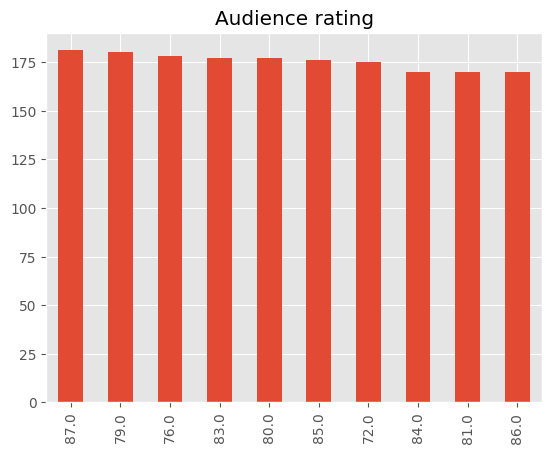

In [103]:
df['audience_rating'].value_counts().nlargest(10).plot(kind='bar', title='Audience rating')

The previous audience rating plot showed us the small range between points, so I've decided to group the rating with the range from 0 to 50 - as the lowest rating, from 50 to 70 - as the middle one, and from 70 to 100 - as the best ones. 
In order to check the number of values that will be divided by groups better off using the query function. We can shrug off this step, but for accuracy double-check, it will be useful.

In [104]:
over_70 = df.query('audience_rating >= 70')
over_70

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.0,51.0,Upright,86.0,23890.0,8,49,2
14,m/1000253-adams_rib,Adam's Rib,A courtroom rivalry finds its way into the hou...,"Matched by Garson Kanin's witty, sophisticated...",NR,"Classics, Comedy, Romance",George Cukor,"Garson Kanin, Ruth Gordon","Spencer Tracy, Katharine Hepburn, Judy Hollida...",1949-11-18,...,MGM Home Entertainment,Fresh,96.0,28.0,Upright,86.0,10563.0,6,27,1
19,m/10003437-deep_blue,Deep Blue,This nature documentary shows the lives of dif...,"Full of visually striking footage, Deep Blue m...",G,"Documentary, Special Interest","Andy Byatt, Alastair Fothergill","Alastair Fothergill, Andy Byatt, Tim Ecott","Pierce Brosnan, Michael Gambon",2005-06-17,...,Miramax Flims,Fresh,67.0,52.0,Upright,80.0,4692.0,18,35,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,m/zombieland,Zombieland,"After a virus turns most people into zombies, ...","Wickedly funny and featuring plenty of gore, Z...",R,"Comedy, Horror",Ruben Fleischer,"Rhett Reese, Paul Wernick","Woody Harrelson, Jesse Eisenberg, Emma Stone, ...",2009-10-02,...,Sony/Columbia Pictures,Certified-Fresh,89.0,255.0,Upright,86.0,643354.0,49,227,28
17700,m/zombieland_double_tap,Zombieland: Double Tap,"Zombie slayers Tallahassee, Columbus, Wichita ...",Zombieland: Double Tap makes up for a lack of ...,R,"Action & Adventure, Comedy, Horror",Ruben Fleischer,"Rhett Reese, Paul Wernick, Dave Callaham","Woody Harrelson, Jesse Eisenberg, Emma Stone, ...",2019-10-18,...,Columbia Pictures,Fresh,68.0,244.0,NaN,88.0,11200.0,31,166,78
17704,m/zoolander,Zoolander,Propelled to the top of the fashion world by a...,"A wacky satire on the fashion industry, Zoolan...",PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller","Ben Stiller, Owen Wilson, Will Ferrell, Christ...",2001-09-28,...,Paramount Pictures,Fresh,64.0,138.0,Upright,80.0,944800.0,33,88,50
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7


In [105]:
to_50 = df.query('audience_rating < 70 and audience_rating >=50')
to_50

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
12,m/10002516-lost_city,The Lost City,"Fico Fellove (Andy Garcia), an apolitical Hava...","Its heart is in the right place, but what star...",R,Drama,Andy Garcia,"G. Cabrera Infante, Guillermo Cabrera Infante","Andy Garcia, Dustin Hoffman, Bill Murray, Inés...",2005-09-03,...,Magnolia Pictures,Rotten,25.0,83.0,Upright,64.0,25944.0,37,21,62
17,m/10003276-criminal,Criminal,Needing a new partner capable of intricate con...,"If you saw Nine Queens, it may feel redundant,...",R,"Drama, Mystery & Suspense","Greggory Jacobs, Gregory Jacobs, Greg Jacobs","Gregory Jacobs, Fabián Bielinsky, Steven Soder...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",2004-09-24,...,Warner Bros. Pictures,Fresh,69.0,124.0,Spilled,57.0,6711.0,35,85,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17677,m/zathura,Zathura: A Space Adventure,After their father (Tim Robbins) is called int...,Dazzling special effects for the kids + well-c...,PG,"Action & Adventure, Kids & Family, Science Fic...",Jon Favreau,"David Koepp, John Kamps","Jonah Bobo, Josh Hutcherson, Dax Shepard, Kris...",2005-11-11,...,Sony Pictures,Certified-Fresh,76.0,161.0,Spilled,51.0,281232.0,37,122,39
17679,m/zaytoun,Zaytoun,A Palestinian refugee and an Israeli pilot for...,"It has a lot on its mind, including a timely s...",NR,"Action & Adventure, Drama",Eran Riklis,Nader Rizq,"Stephen Dorff, Abdallah El Akal, Ali Suliman, ...",2013-09-20,...,Strand Releasing,Rotten,46.0,39.0,Spilled,51.0,285.0,15,18,21
17683,m/zero_charisma,Zero Charisma,A middle-aged nerd serving as grand master of ...,Zero Charisma takes a refreshingly empathetic ...,NR,Comedy,"Katie Graham, Andrew Matthews",Andrew Matthews,"Sam Eidson, Anne Gee Byrd, Garrett Graham, Bro...",2013-10-11,...,Tribeca Film,Fresh,76.0,25.0,Spilled,55.0,1109.0,8,19,6
17688,m/zerophilia,Zerophilia,"While on a camping trip, an inexperienced youn...","Zerophilia has some intriguing ideas, but they...",NR,"Art House & International, Comedy, Drama",Martin Curland,Martin Curland,"Taylor Handley, Alison Folland, Dustin Seavey,...",2005-10-26,...,GoDigital,Rotten,25.0,20.0,Upright,61.0,1628.0,11,5,15


In [106]:
under_50 = df.query('audience_rating < 50')
under_50

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137
15,m/10002635-bridge_of_san_luis_rey,The Bridge of San Luis Rey,"During the Spanish Inquisition, Franciscan mon...",Despite an all-star cast and some impressive v...,PG,"Art House & International, Drama, Faith & Spir...",Mary McGuckian,Mary McGuckian,"Gabriel Byrne, F. Murray Abraham, Kathy Bates,...",2005-06-10,...,Fine Line Features,Rotten,4.0,24.0,Spilled,35.0,1935.0,13,1,23
30,m/10004504-ultraviolet,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,...,Sony Pictures,Rotten,8.0,83.0,Spilled,30.0,279994.0,21,7,76
34,m/10004697-eternal,Eternal,A detective's (Conrad Pla) search for his miss...,"Even by the standards of camp, Eternal fails t...",R,"Horror, Mystery & Suspense","Wilhelm Liebenberg, Federico Sanchez","Wilhelm Liebenberg, Federico Sanchez","Sarah Manninen, Caroline Neron, Victoria Sanch...",2004-08-26,...,Regent Releasing,Rotten,21.0,34.0,Spilled,39.0,1295.0,10,7,27
55,m/10006343-dirty,Dirty,Armando Sancho (Clifton Collins Jr.) is a form...,Dirty is an unoriginal L.A. cop drama that wea...,R,Drama,Chris Fisher,"Chris Fisher, Gil Reavill, Eric Saks","Cuba Gooding Jr., Wyclef Jean, Keith David, Cl...",2006-02-24,...,SNP Inc.,Rotten,21.0,28.0,Spilled,42.0,7326.0,10,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17695,m/zombeavers,Zombeavers,College friends find their weekend of sex and ...,"Zombeavers obviously isn't high art, but it de...",R,"Action & Adventure, Comedy, Horror",Jordan Rubin,"Jon Kaplan, Al Kaplan","Rachel Melvin, Cortney Palm, Lexi Atkins, Hutc...",2015-03-20,...,Freestyle Releasing,Fresh,69.0,36.0,Spilled,31.0,3657.0,7,25,11
17698,m/zombie_strippers,Zombie Strippers,"With too many wars and too few soldiers, a lab...","Though intentionally campy, Zombie Strippers s...",R,"Comedy, Horror",Jay Lee,Jay Lee,"Jenna Jameson, Robert Englund, Roxy Saint, Joe...",2008-04-18,...,Triumph Films,Rotten,39.0,64.0,Spilled,30.0,7652.0,16,25,39
17703,m/zookeeper,Zookeeper,Kindhearted Griffin Keyes (Kevin James) is one...,Zookeeper smothers Kevin James's with a sodden...,PG,"Comedy, Romance","Frank Coraci, Walt Becker","Jay Scherick, David Ronn, Nick Bakay, Rock Reu...","Kevin James, Rosario Dawson, Ken Jeong, Leslie...",2011-07-08,...,Columbia Pictures,Rotten,14.0,132.0,Spilled,41.0,44713.0,36,18,114
17705,m/zoolander_2,Zoolander 2,Former models Derek Zoolander (Ben Stiller) an...,Zoolander No. 2 has more celebrity cameos than...,PG-13,Comedy,Ben Stiller,"Nicholas Stoller, John Hamburg, Ben Stiller, J...","Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",2016-02-12,...,Paramount Pictures,Rotten,22.0,232.0,Spilled,20.0,41745.0,48,51,181


This step for creating a new column with our rating distinction will help to use values and find out the frequency.

In [107]:
def get_audience_score(audience_rating):
    if audience_rating >= 70:
        return 'over_70'
    if audience_rating < 70 and audience_rating >=50:
        return 'up_to_50'
    if audience_rating < 50:
        return 'under_50'

df['audience_ratings_score'] = df['audience_rating'].map(get_audience_score)

C:\Users\Ирина\AppData\Local\Temp\ipykernel_12084\1219308237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['audience_ratings_score'] = df['audience_rating'].map(get_audience_score)


Here is the result, the graph shows the most frequent rating was from 50 to 70 scores and the middle and the lowest ones have almost the same quantity of values.

<AxesSubplot: title={'center': 'Audience rating'}>

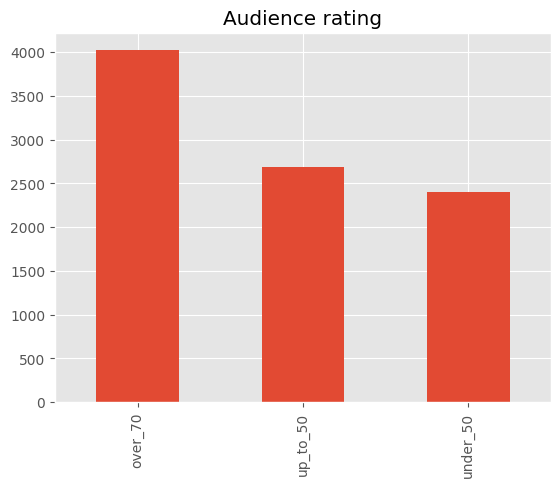

In [108]:
df['audience_ratings_score'].value_counts().plot(kind='bar', title='Audience rating')

It is unlikely that we will use libraries to analyze only one phrase in a data set, but let's look at how data processing by a library works using one example.

In [109]:
example = df['critics_consensus'][50]
print(example)

While Alien was a marvel of slow-building, atmospheric tension, Aliens packs a much more visceral punch, and features a typically strong performance from Sigourney Weaver.


In [110]:
tokens = nltk.word_tokenize(example)
tokens

['While',
 'Alien',
 'was',
 'a',
 'marvel',
 'of',
 'slow-building',
 ',',
 'atmospheric',
 'tension',
 ',',
 'Aliens',
 'packs',
 'a',
 'much',
 'more',
 'visceral',
 'punch',
 ',',
 'and',
 'features',
 'a',
 'typically',
 'strong',
 'performance',
 'from',
 'Sigourney',
 'Weaver',
 '.']

In [111]:
tagged = nltk.pos_tag(tokens)
tagged

[('While', 'IN'),
 ('Alien', 'NNP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('marvel', 'NN'),
 ('of', 'IN'),
 ('slow-building', 'NN'),
 (',', ','),
 ('atmospheric', 'JJ'),
 ('tension', 'NN'),
 (',', ','),
 ('Aliens', 'NNP'),
 ('packs', 'VBZ'),
 ('a', 'DT'),
 ('much', 'RB'),
 ('more', 'RBR'),
 ('visceral', 'JJ'),
 ('punch', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('features', 'VBZ'),
 ('a', 'DT'),
 ('typically', 'RB'),
 ('strong', 'JJ'),
 ('performance', 'NN'),
 ('from', 'IN'),
 ('Sigourney', 'NNP'),
 ('Weaver', 'NNP'),
 ('.', '.')]

In [112]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  While/IN
  (PERSON Alien/NNP)
  was/VBD
  a/DT
  marvel/NN
  of/IN
  slow-building/NN
  ,/,
  atmospheric/JJ
  tension/NN
  ,/,
  (GPE Aliens/NNP)
  packs/VBZ
  a/DT
  much/RB
  more/RBR
  visceral/JJ
  punch/NN
  ,/,
  and/CC
  features/VBZ
  a/DT
  typically/RB
  strong/JJ
  performance/NN
  from/IN
  (PERSON Sigourney/NNP Weaver/NNP)
  ./.)


For the further sentiment analysis we have to import related libraries. Let's do it!

In [113]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

That is a result of sentiment analysis for one specific consensus. The next step is to apply the same approach for the whole review column.

In [114]:
sia.polarity_scores(example)

{'neg': 0.084, 'neu': 0.693, 'pos': 0.223, 'compound': 0.5859}

There was added a separate column with numbers of negative, positive, and neutral scores for each critics consensus.

In [115]:
df['scores']=df['critics_consensus'].apply(lambda critics_consensus: sia.polarity_scores(str(critics_consensus)))
df.head()

C:\Users\Ирина\AppData\Local\Temp\ipykernel_12084\1301163589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scores']=df['critics_consensus'].apply(lambda critics_consensus: sia.polarity_scores(str(critics_consensus)))


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,audience_ratings_score,scores
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,up_to_50,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou..."
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,87.0,142.0,Upright,64.0,11574.0,44,123,19,up_to_50,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp..."
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,67.0,24.0,Spilled,53.0,14684.0,2,16,8,up_to_50,"{'neg': 0.262, 'neu': 0.547, 'pos': 0.191, 'co..."
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,100.0,54.0,Upright,97.0,105386.0,6,54,0,over_70,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,89.0,27.0,Upright,74.0,68918.0,5,24,3,over_70,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."


Here were created 3 more columns: compound - as the total score result by review, and 2 other columns: neg - as the negative score and pos - as the number of positive scores.

In [116]:
df['compound']=df['scores'].apply(lambda score_dict:score_dict['compound'])
df['pos']=df['scores'].apply(lambda pos_dict:pos_dict['pos'])
df['neg']=df['scores'].apply(lambda neg_dict:neg_dict['neg'])
df.head()

C:\Users\Ирина\AppData\Local\Temp\ipykernel_12084\1039571235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound']=df['scores'].apply(lambda score_dict:score_dict['compound'])
C:\Users\Ирина\AppData\Local\Temp\ipykernel_12084\1039571235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos']=df['scores'].apply(lambda pos_dict:pos_dict['pos'])
C:\Users\Ирина\AppData\Local\Temp\ipykernel_12084\1039571235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,audience_ratings_score,scores,compound,pos,neg
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,53.0,254421.0,43,73,76,up_to_50,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.9274,0.410,0.000
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,64.0,11574.0,44,123,19,up_to_50,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.5023,0.115,0.000
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,53.0,14684.0,2,16,8,up_to_50,"{'neg': 0.262, 'neu': 0.547, 'pos': 0.191, 'co...",-0.4676,0.191,0.262
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,97.0,105386.0,6,54,0,over_70,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.5423,0.231,0.000
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,74.0,68918.0,5,24,3,over_70,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.7579,0.213,0.000


To summarize the result and spot whether the consensus was positive, negative, or neutral let's create column 'type'.

In [117]:
df['type']=''
df.loc[df.compound>0,'type']='POS'
df.loc[df.compound==0,'type']='NEUTRAL'
df.loc[df.compound<0,'type']='NEG'
df

C:\Users\Ирина\AppData\Local\Temp\ipykernel_12084\347397586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type']=''


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,audience_ratings_score,scores,compound,pos,neg,type
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,254421.0,43,73,76,up_to_50,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.9274,0.410,0.000,POS
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,11574.0,44,123,19,up_to_50,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.5023,0.115,0.000,POS
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,14684.0,2,16,8,up_to_50,"{'neg': 0.262, 'neu': 0.547, 'pos': 0.191, 'co...",-0.4676,0.191,0.262,NEG
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,105386.0,6,54,0,over_70,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.5423,0.231,0.000,POS
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,68918.0,5,24,3,over_70,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.7579,0.213,0.000,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17704,m/zoolander,Zoolander,Propelled to the top of the fashion world by a...,"A wacky satire on the fashion industry, Zoolan...",PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller","Ben Stiller, Owen Wilson, Will Ferrell, Christ...",2001-09-28,...,944800.0,33,88,50,over_70,"{'neg': 0.131, 'neu': 0.635, 'pos': 0.234, 'co...",0.3818,0.234,0.131,POS
17705,m/zoolander_2,Zoolander 2,Former models Derek Zoolander (Ben Stiller) an...,Zoolander No. 2 has more celebrity cameos than...,PG-13,Comedy,Ben Stiller,"Nicholas Stoller, John Hamburg, Ben Stiller, J...","Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",2016-02-12,...,41745.0,48,51,181,under_50,"{'neg': 0.067, 'neu': 0.762, 'pos': 0.171, 'co...",0.5267,0.171,0.067,POS
17706,m/zoom_2006,Zoom,"Capt. Zoom, or Jack (Tim Allen), as he is now ...",Lacking the punch and good cheer of The Incred...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,...,11369.0,19,3,65,under_50,"{'neg': 0.113, 'neu': 0.628, 'pos': 0.259, 'co...",0.5423,0.259,0.113,POS
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,101511.0,50,285,7,over_70,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.9413,0.378,0.000,POS


In [118]:
pos = len(df[df['type']=='POS'])
neg = len(df[df['type']=='NEG'])
neutral = len(df[df['type']=='NEUTRAL'])
print("Positive :"+str(pos)+ "  Negative :" + str(neg) + "   Neutral :"+ str(neutral))

Positive :6073  Negative :2509   Neutral :552


<AxesSubplot: title={'center': 'Audience rating'}>

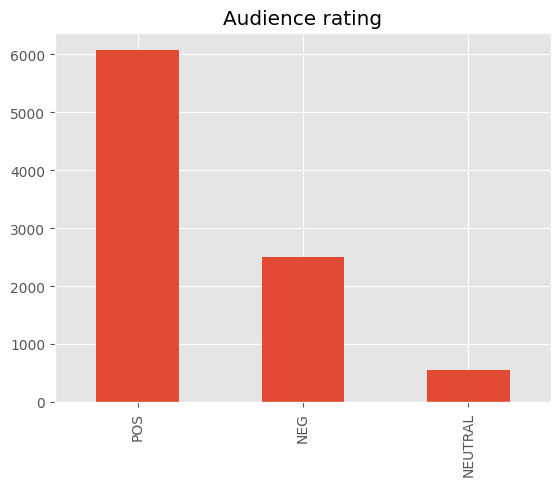

In [119]:
df['type'].value_counts().plot(kind='bar', title='Audience rating')

So, as the result, we can see that most often sentiment is positive.

The next step is to create a word cloud of the most frequent words used in the critics' consensus column overall and to make the disaggregating version with only negative and positive consensus.

In [121]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [122]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["critics_consensus"] = df["critics_consensus"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ирина\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Ирина\AppData\Local\Temp\ipykernel_12084\2303639056.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["critics_consensus"] = df["critics_consensus"].apply(clean)


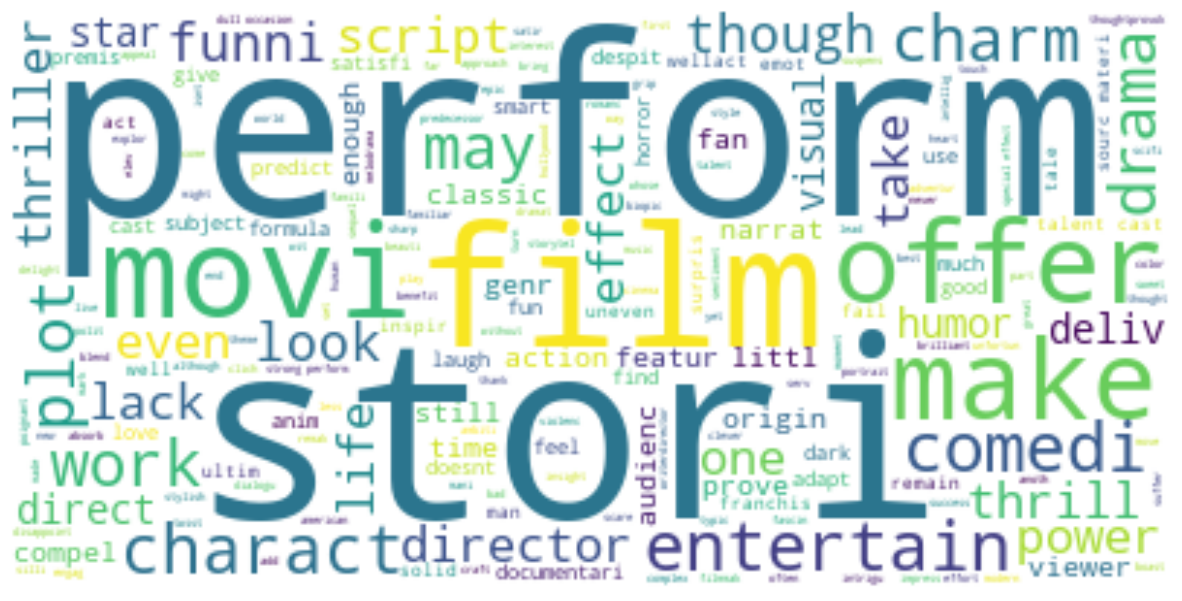

In [123]:
text = " ".join(i for i in df.critics_consensus)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

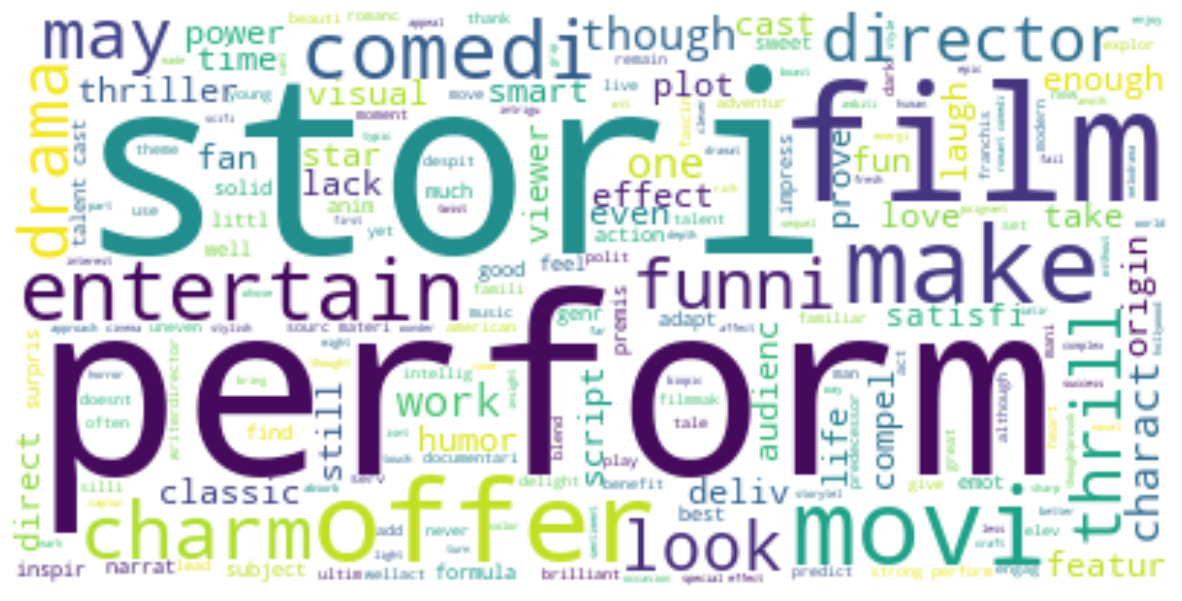

In [124]:
positive =' '.join([i for i in df['critics_consensus'][df['pos'] > df["neg"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

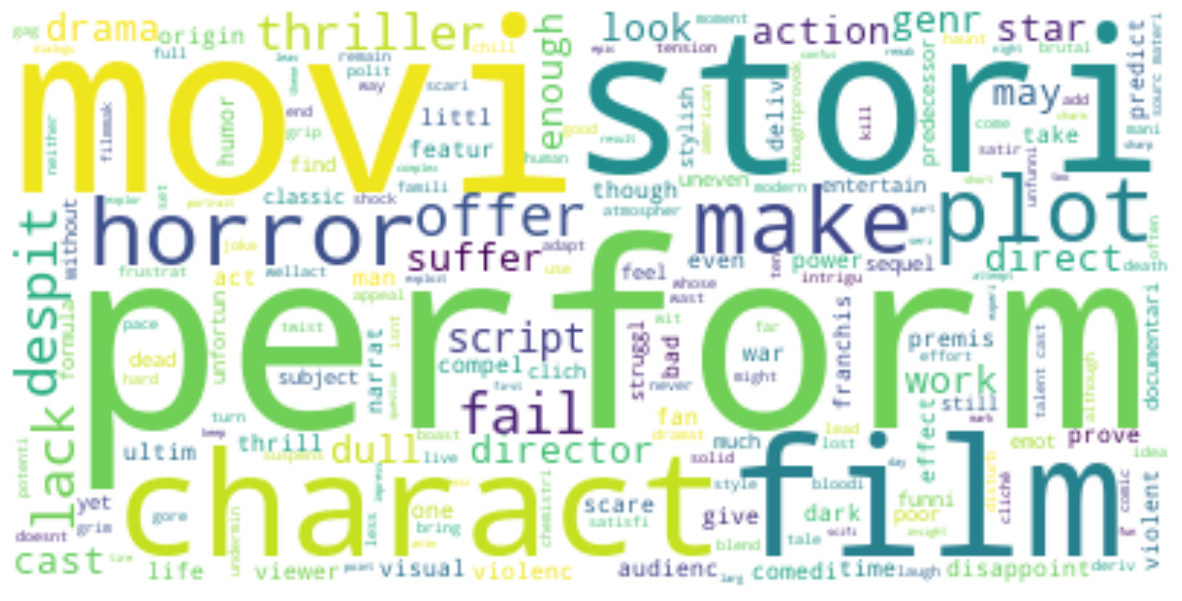

In [125]:
negative =' '.join([i for i in df['critics_consensus'][df['neg'] > df["pos"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see there are a lot of related things in the positive word cloud and negative word cloud, but here we can also see the small distinction as we have such positive words - funny, life, humor, charm, and thrill in the positive cloud. However negative one has such statements - suffer, dark, violence, enough.